In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

# Introduction to Statistics:
An Aperitif for DSFP Session 4
========

#### Version 0.1

***
By AA Miller 2017 Sep 14

An [Introduction to Statistics](https://github.com/LSSTC-DSFP/LSSTC-DSFP-Sessions/blob/master/Session1/Day2/IntroStat.pdf) was covered during Session 1 of the DSFP. Typically, this initial lecture is used as a means of providing a brief overview of the Session 1 material, but that does not make sense in the context of Session 4, as half of you have not seen this lecture.

Instead, today we will focus on a relatively simple problem, while highlighting several challenges for the standard astronomical workflow, as a way of setting up the various lectures that will happen over the course of this week. 

A lot of the lessons in this lecture are inspired by the paper [Data Analysis Recipes: Fitting a Model to Data](https://arxiv.org/abs/1008.4686) by Hogg, Bovy, & Lang. [This paper has been mentioned previously in the DSFP, though today we will only be able to scratch the surface of its content.]

In some sense - the goal right now is to make you really nervous about the work that you've previously done. 

(Though this lecture should not be met with too much consternation, as you will have a toolkit to deal with all the issues that we raise by the end of the week)

## Problem 1) Data

At the core of everything we hope to accomplish with the DSFP stands a single common connection: data.

There are many things we (may) want to do with these data: reduce them, visualize them, model them, develop predictions from them, use them to infer fundamental properties of the universe to gain a unique understanding that no one else in the history of our planet has ever had (!).

Before we dive into that really fun stuff, we should start with some basics:

**Problem 1a**

What is data?

*Take a few min to discuss this with your partner*

**Solution 1a**

While we just discussed several different ideas about the nature of data, the main thing I want to emphasize is the following: data are *constants*. 

**Need some more text on this to elaborate**

**Problem 1b**

Below, I provide some data (in the form of `numpy` arrays). As good data scientists, what is the first thing you should do with this data?

Feel free to create a new cell if necessary.

In [3]:
y = np.array([203, 58, 210, 202, 198, 158, 
              165, 201, 157, 131, 166, 160, 
              186, 125, 218, 146])
x = np.array([495, 173, 479, 504, 510, 416, 
              393, 442, 317, 311, 400, 337, 
              423, 334, 533, 344])

**Solution 1b**

I intentionally mislead with the previous question. 

The most important thing to do with *any* new data is understand where the data came from and what they represent. While the data are constants, they represent measurements of some kind. Thus, I would argue the most important thing to do with this data is understand where they came from (others may disagree). 

In the case of the arrays, the answer is that they are "toy" data that were generated for illustrative purposes in the Hogg, Bovy, & Lang paper discussed above. In that sense, there are no units or specific measurements that otherwise need to be understood. 

**Problem 1c**

[You may have already done this] Now that we understand the origin of the data, make a scatter plot showing their distribution.

<IPython.core.display.Javascript object>


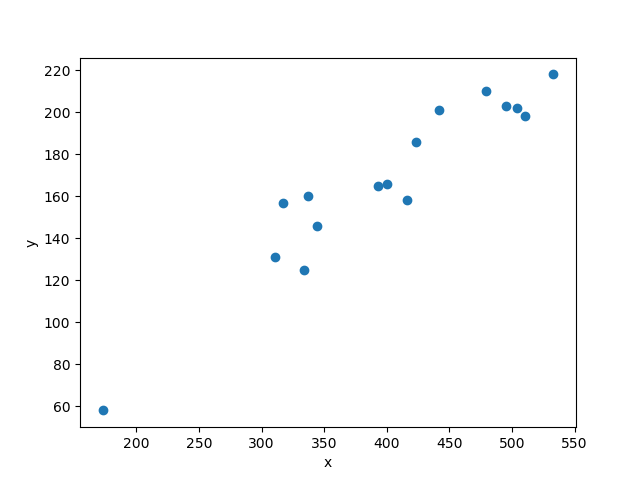

In [12]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")

## Probelm 2) Fitting a Line to Data

There is a very good chance, though I am not specifically assuming anything, that upon making the previous plot you had a thought along the lines of "these points fall on a line" or "these data represent a linear relationship."  

**Problem 2a** 

Is the assumption of linearity valid for the above data?

Is it convenient?

**Solution 2a**

One of the primary lessons from this lecture is the following: *assumptions are dangerous*! In general, a linear relationship between data should only be assumed if there is a very strong theoretical motivation for such a relationship. Otherwise, the relationship could be just about anything, and inference based on an assumption of linearity may lead to dramatically incorrect conclusions (Friday's talk by Adam will cover Model Selection).

That being said, assuming the data represent (are drawn) from a linear relationship is often very convenient. There are a large host of tools designed to solve this very problem.

Let us proceed with convenience and assume the data represent a linear relationship. In that case, in order to make predictions for future observations, we need to fit a line to the data. 

The "standard" proceedure for doing so is [least-squares fitting](https://en.wikipedia.org/wiki/Least_squares). In brief, least-squares minimizes the sum of the squared value of the residuals between the data and the fitting function.

I've often joked that all you need to be a good data scientist is [google](https://www.google.com) and [stack overflow](https://stackoverflow.com). Via those two tools, we can quickly deduce that the easiest way to perform a linear least-squares fit to the above data is with [`np.polyfit`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html), which performs a least-squares polynomial fit to two `numpy` arrays.

**Problem 2b**

Use `np.polyfit()` to fit a line to the data. Overplot the best-fit line on the data.

<IPython.core.display.Javascript object>


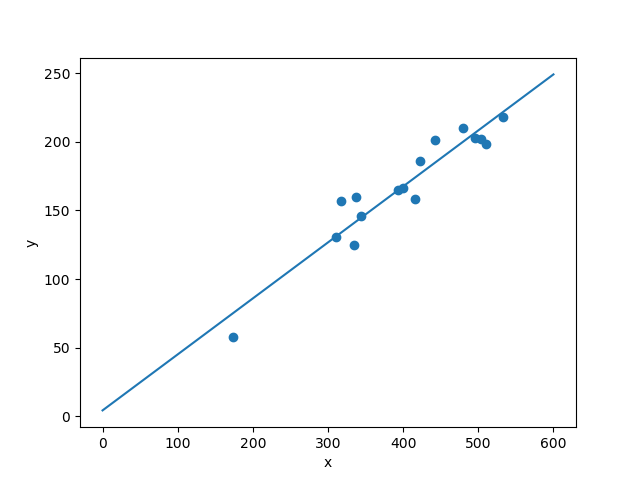

In [13]:
p = np.polyfit(x, y, 1)
p_eval = np.poly1d(p)

plt.scatter(x,y)
plt.plot([0,600], p_eval([0,600]))
plt.xlabel("x")
plt.ylabel("y")

There is a very good chance, though I am not specifically assuming anything, that for the previous plots that you plotted `x` along the abscissa and `y` along the ordinate. 

[Honestly, there's no one to blame if this is the case, this has essentially been drilled into all of us from the moment we started making plots. In fact, in `matplotlib` we cannot change the name of the abscissa label without adjusting the `xlabel`.]

This leads us to an important question, however. What if `y` does not depend on `x` and instead `x` depends on `y`? Does that in any way change the results for the fit?

**Problem 2c**

Perform a linear least-squares fit to `x` vs. `y` (or if you already fit this, then reverse the axes). As above, plot the data and the best-fit model.

To test if the relation is the same between the two fits, compare the predicted `y` value for both models corresponding to `x = 300`.

<IPython.core.display.Javascript object>


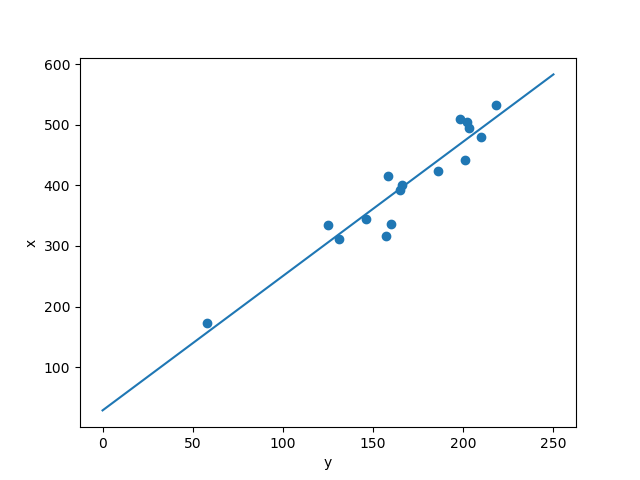

For y vs. x, then x=50 would predict y=24.80311423398867
For x vs. y, then x=50 would predict y=9.544353223417994


In [19]:
p_yx = np.polyfit(y, x, 1)
p_yx_eval = np.poly1d(p_yx)

plt.scatter(y,x)
plt.plot([0,250], p_yx_eval([0,250]))
plt.xlabel("y")
plt.ylabel("x")

print("For y vs. x, then x=50 would predict y={}".format(p_eval(50)))
print("For x vs. y, then x=50 would predict y={}".format((50 - p_yx[1])/p_yx[0]))

So we have now uncovered one of the peculiariaties of least-squares. Fitting `y` vs. `x` is *not* the same as fitting `x` vs. `y`.

There are several assumptions that go into standard least-squares fitting:

1. There is one dimension along which the data have negligible uncertainties
2. Along the other dimension **all** of the uncertainties can be described via Gaussians of known variance

These two conditions are *rarely* met for astronomical data. While condition 1 can be satisfied (e.g., time series data where there is essentially no uncertainty on the time of the observations), I contend that condition 2 is rarely, if ever, satisfied.